#Education Data Vasualization

##Context
The Education dataset encompasses detailed information on a range of U.S. colleges and universities, capturing metrics across admissions, academics, student demographics, faculty qualifications, and institutional expenditures. These data points offer valuable insights into how different institutions operate and support student success. Understanding these patterns is essential for policymakers, educational analysts, and institutional decision-makers seeking to improve student outcomes and resource allocation.



##Objective
The primary objective of this project is to explore and visualize the relationships between key institutional variables and student success indicators—such as graduation rate, student enrollment, and expenditure per student. By leveraging data visualizations, we aim to:

* Identify factors that are most strongly associated with higher graduation rates.

* Compare institutional characteristics (e.g., faculty qualifications, student/faculty ratio) across colleges.

* Detect potential trends or anomalies in expenditure, student demographics, and academic outcomes.

* Present actionable insights for improving educational strategy and resource investment in higher education.

## Dataset
The Education dataset contains information on various colleges in the USA. It contains the following features:

* Names: Names of various universities and colleges
* Apps: The number of applications received
* Accept: The number of applications accepted
* Enroll: The number of new students enrolled
* Top10perc: The percentage of new students from the top 10% of Higher Secondary class
* Top25perc: The percentage of new students from the top 25% of Higher Secondary class
* F_Undergrad: The number of full-time undergraduate students
* P_Undergrad: The number of part-time undergraduate students

* Outstate: The number of students for whom the particular college or university is out-of-state tuition

* Room_Board: The cost of room and board
* Books: The estimated cost of books for a student
* Personal: The estimated personal spending for a student
* PhD: The percentage of faculties with a Ph.D.
* Terminal: The percentage of faculties with a terminal degree
* S_F_Ratio: Student/faculty ratio
* perc_alumni: Percentage of alumni who donate
* Expend: The instructional expenditure per student
* Grad_Rate: Graduation rate

## Importing libraries and overview of the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

##Loading data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/DataScience.MIT/Data Analysis and Visualization/Education.csv')

In [4]:
data.head(10)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [5]:
data.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


###Checking data info


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

**Observations**:

* There are 777 observations and 18 columns in the dataset.
* All columns have 777 non-null values, i.e., there are no missing values.
* All columns are numeric except the "Names" column which is of object data type.


##Data Preprocessing and Exploratory Data Analysis


Checking if all college names are unique

In [7]:
data.Names.nunique()

777

**Observations**:

* All college names are unique.
* As all entries are unique, it would not add value to our analysis. We can drop the "Names" column.

In [8]:
data.drop(columns = "Names", inplace = True)

## Summary Statistics


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


* **Applications and Admissions:** Colleges receive a wide range of applications (Apps), with a mean of about 3002, but this varies greatly (standard deviation of 3870). The number of students accepted (Accept) and enrolled (Enroll) also varies considerably.
* **Student Quality:** On average, about 27.5% of incoming students were in the top 10% of their high school class (Top10perc), and about 55.8% were in the top 25% (Top25perc).
* **Student Body**: The average number of full-time undergraduates (F_Undergrad) is 3700, while the average number of part-time undergraduates (P_Undergrad) is 855.
* Costs: The average out-of-state tuition (Outstate) is around $10,440, and the average room and board cost (Room_Board) is $4358.
* Faculty: Colleges have, on average, 72.7% of faculty with a PhD (PhD) and 79.7% with a terminal degree (Terminal).
* Student-Faculty Ratio: The average student-to-faculty ratio (S_F_Ratio) is 14.09.
* Expenditures: The average expenditure per student (Expend) is $9660.
* Graduation Rate: The average graduation rate (Grad_Rate) is 65.5%.
* **Note**: PhD and Grad_Rate have a maximum value of greater than 100 which is not possible as these variables are in percentages. Let's check how many such observations are there in the data.

In [10]:
data [(data.PhD > 100) | (data.Grad_Rate > 100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


There is just one such observation for each variable. We can cap the values to 100%.



In [11]:
data.loc [582, "PhD"] = 100
data.loc [582, "Grad_Rate"] = 100

**Let's visualize the data outliners**



Apps
skew: 3.72


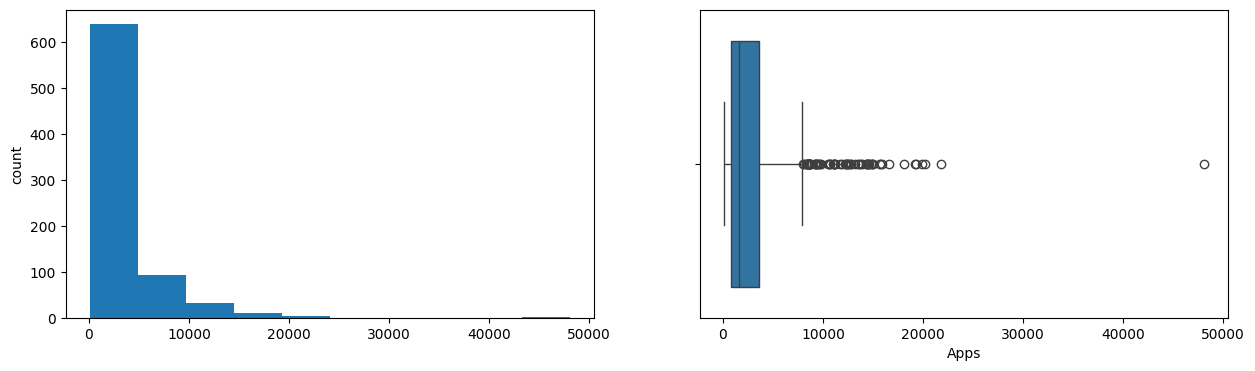

Accept
skew: 3.42


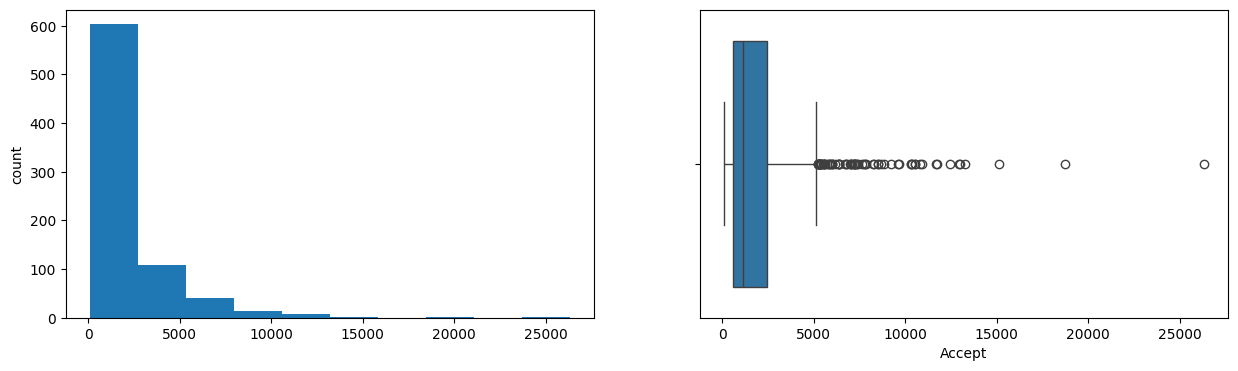

Enroll
skew: 2.69


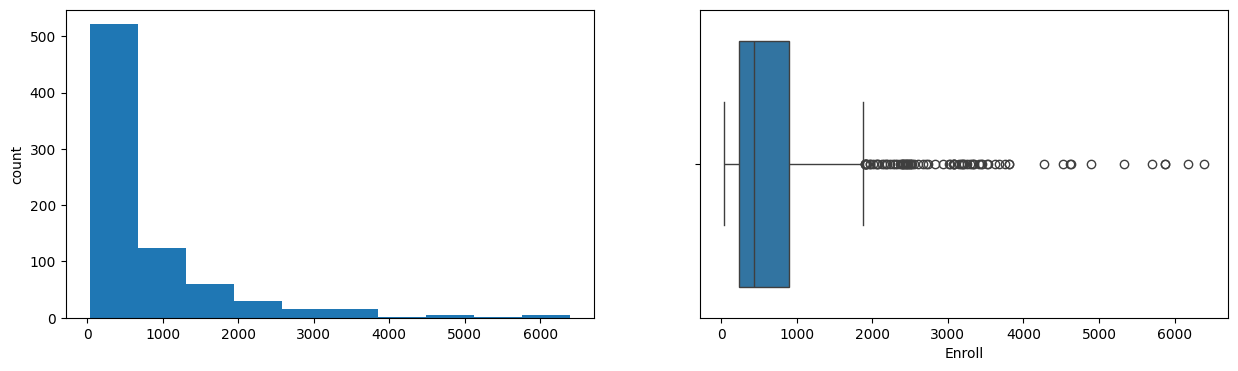

Top10perc
skew: 1.41


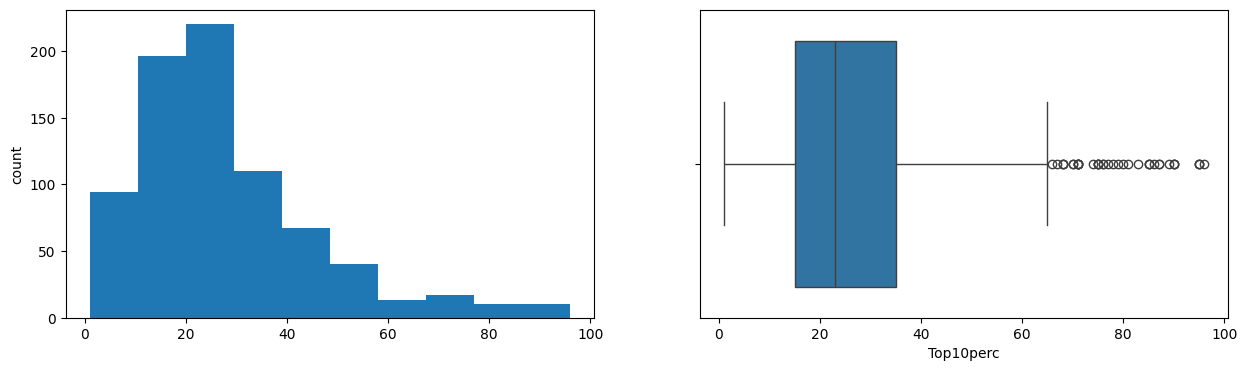

Top25perc
skew: 0.26


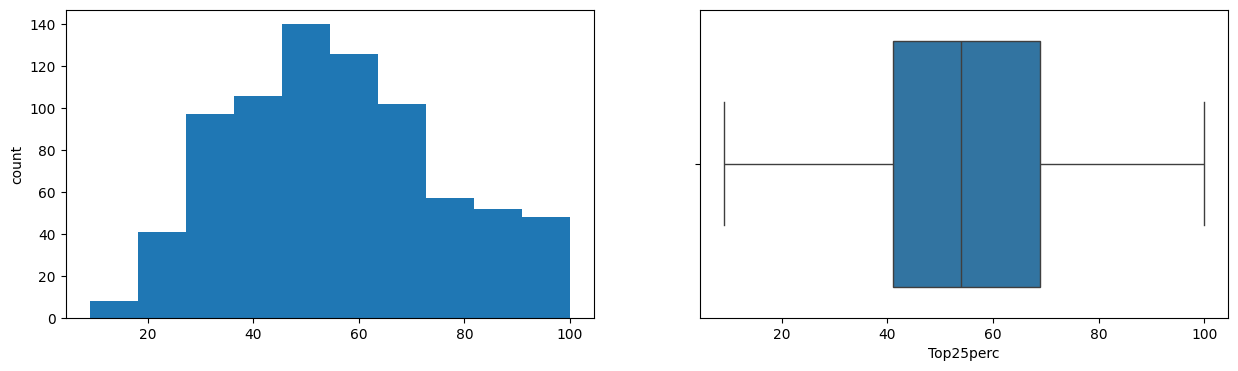

F_Undergrad
skew: 2.61


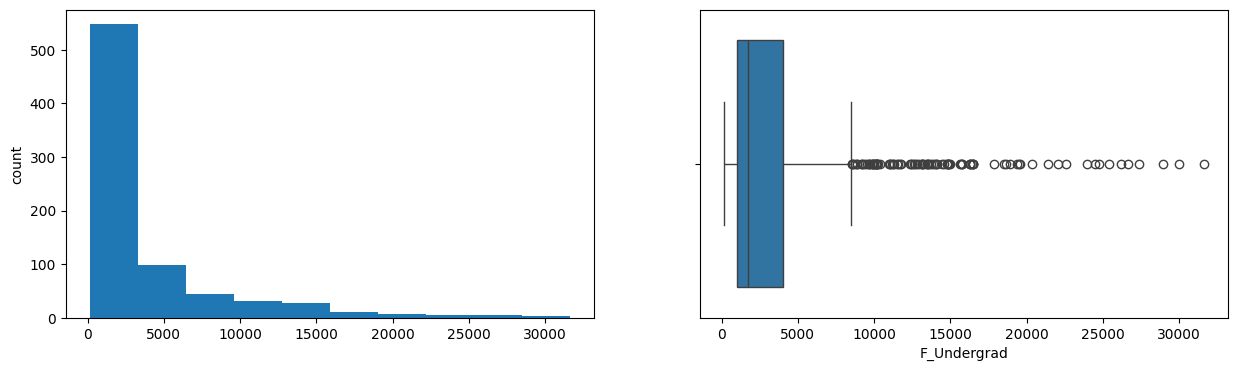

P_Undergrad
skew: 5.69


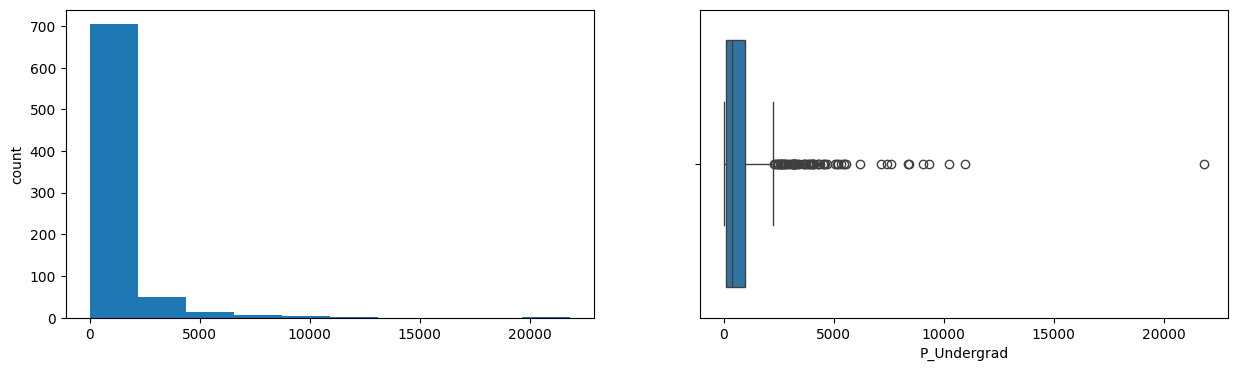

Outstate
skew: 0.51


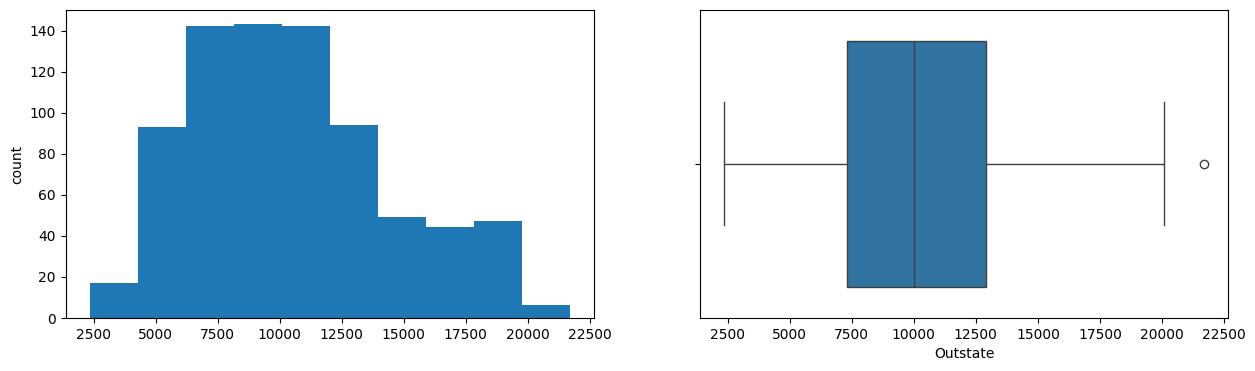

Room_Board
skew: 0.48


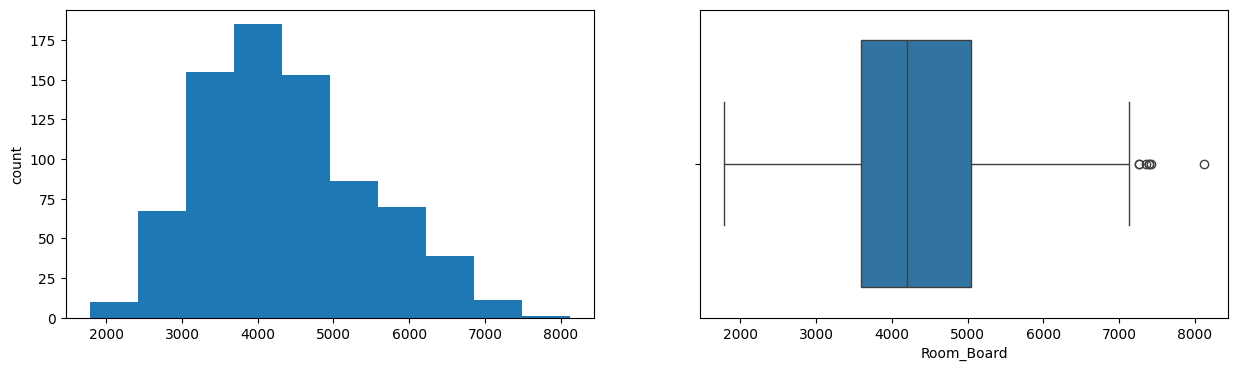

Books
skew: 3.49


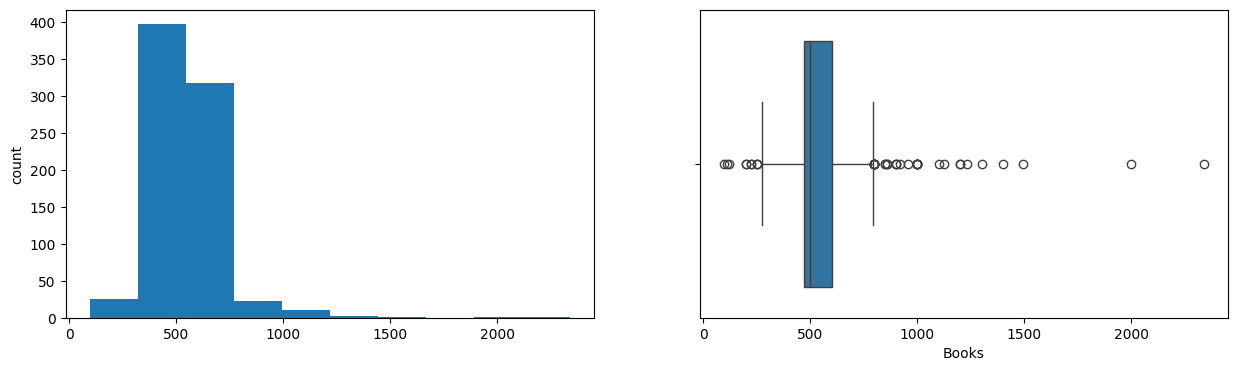

Personal
skew: 1.74


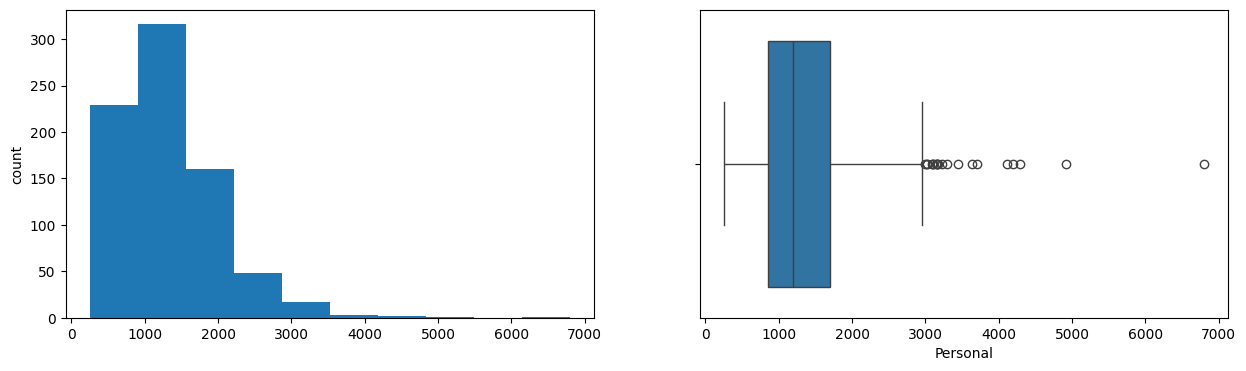

PhD
skew: -0.77


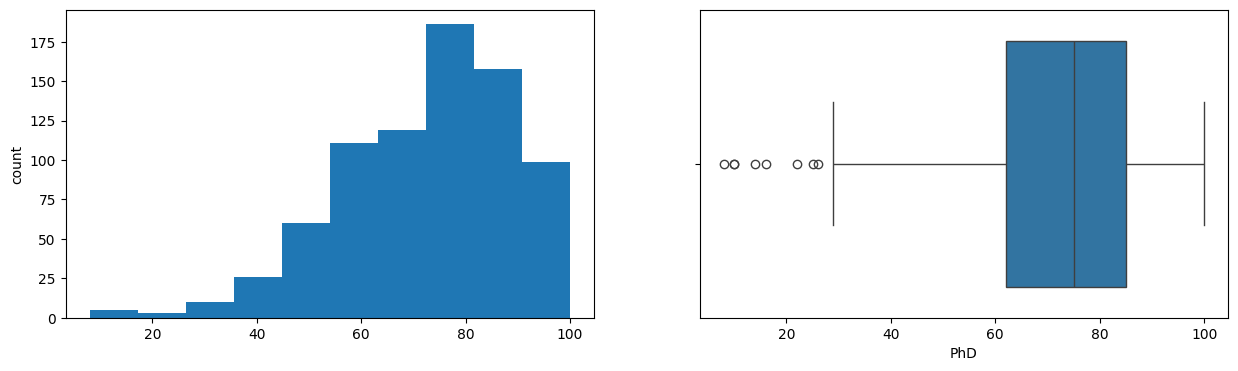

Terminal
skew: -0.82


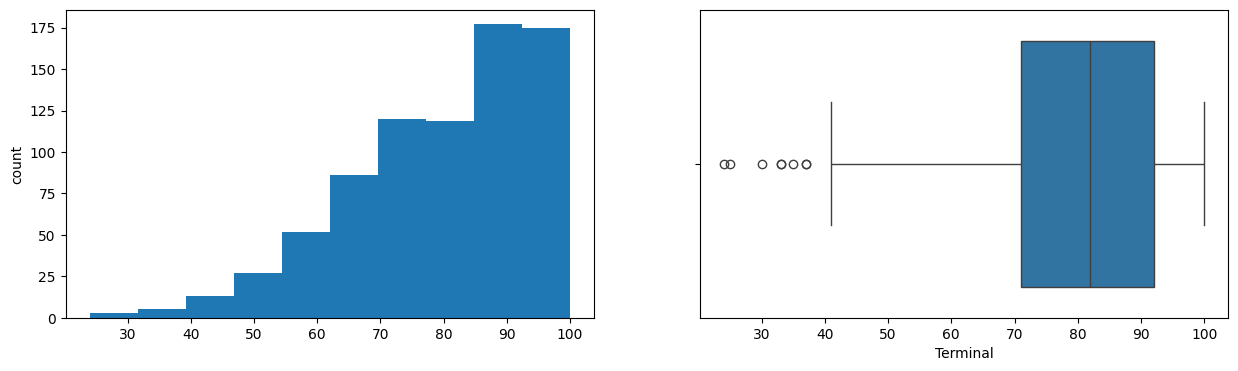

S_F_Ratio
skew: 0.67


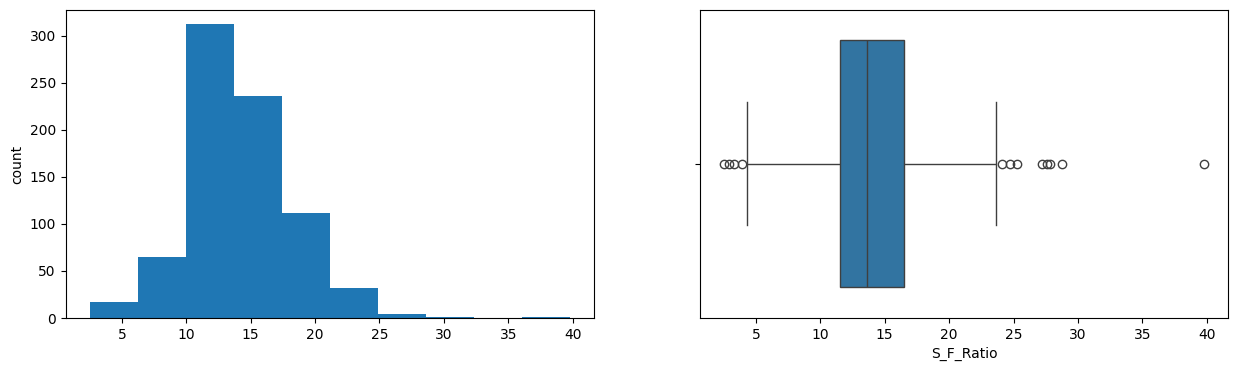

perc_alumni
skew: 0.61


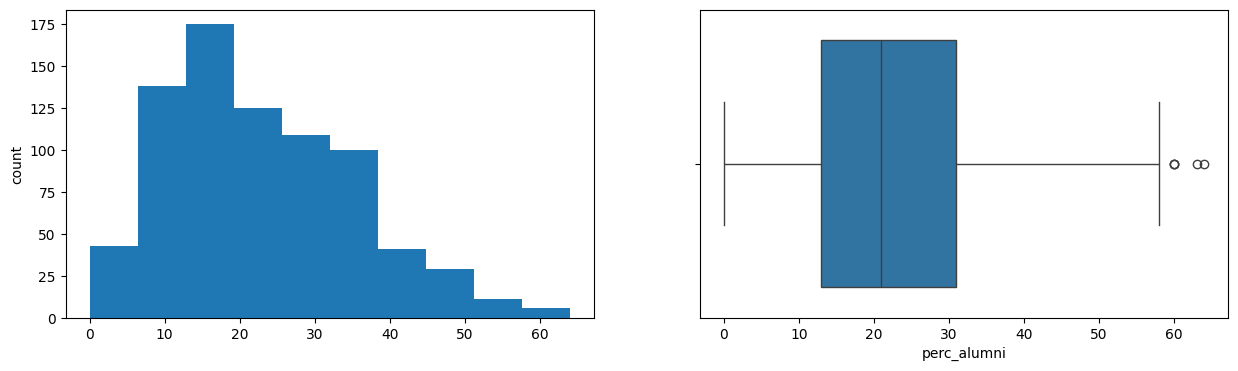

Expend
skew: 3.46


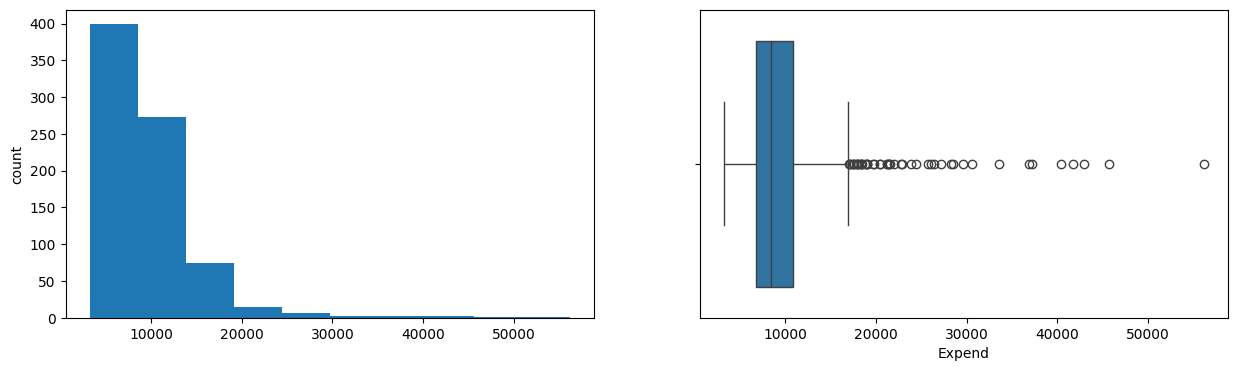

Grad_Rate
skew: -0.11


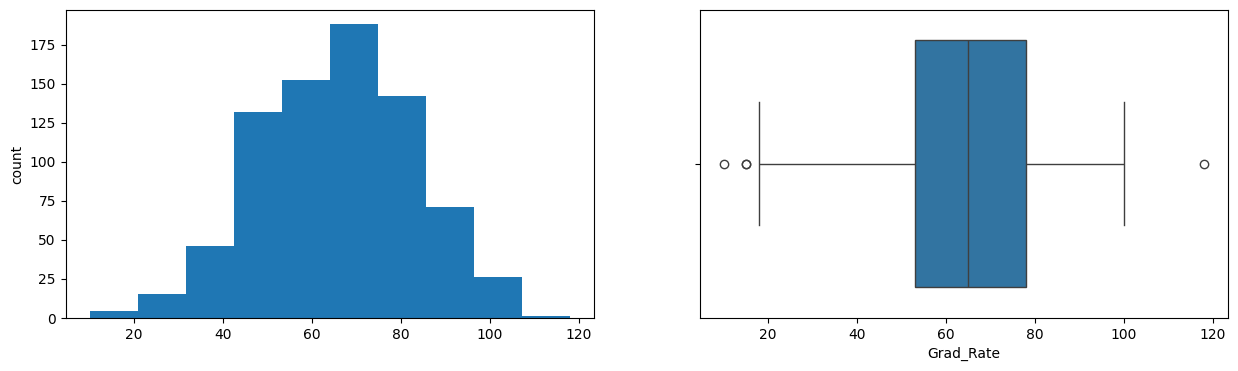

In [12]:
cont_cols = data.columns.tolist()

for col in cont_cols:

    print(col)

    print("skew:", round(data[col].skew(),2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins= 10, grid=False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x=data[col])

    plt.show()


**Observations**:

* The distribution plots show that Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, Books, Personal, and Expend variables are highly right skewed. It is evident from the boxplots that all these variables have outliers.
* Top25percent is the only variable which does not possess outliers in the boxplot.
* Outstate, Room_Board, S_F_Ratio, and perc_alumni seem to have a moderate right skew.
* PhD and Terminal are moderately left skewed.

**Note**: While significant outliers were observed in several variables, we have chosen not to address them at this stage. For now, our focus is on data visualization and exploratory reporting, rather than data preprocessing or modeling. Outlier treatment may be considered in later phases if it impacts analysis or model performance.

**Now, let's check the correlation among different variables.**




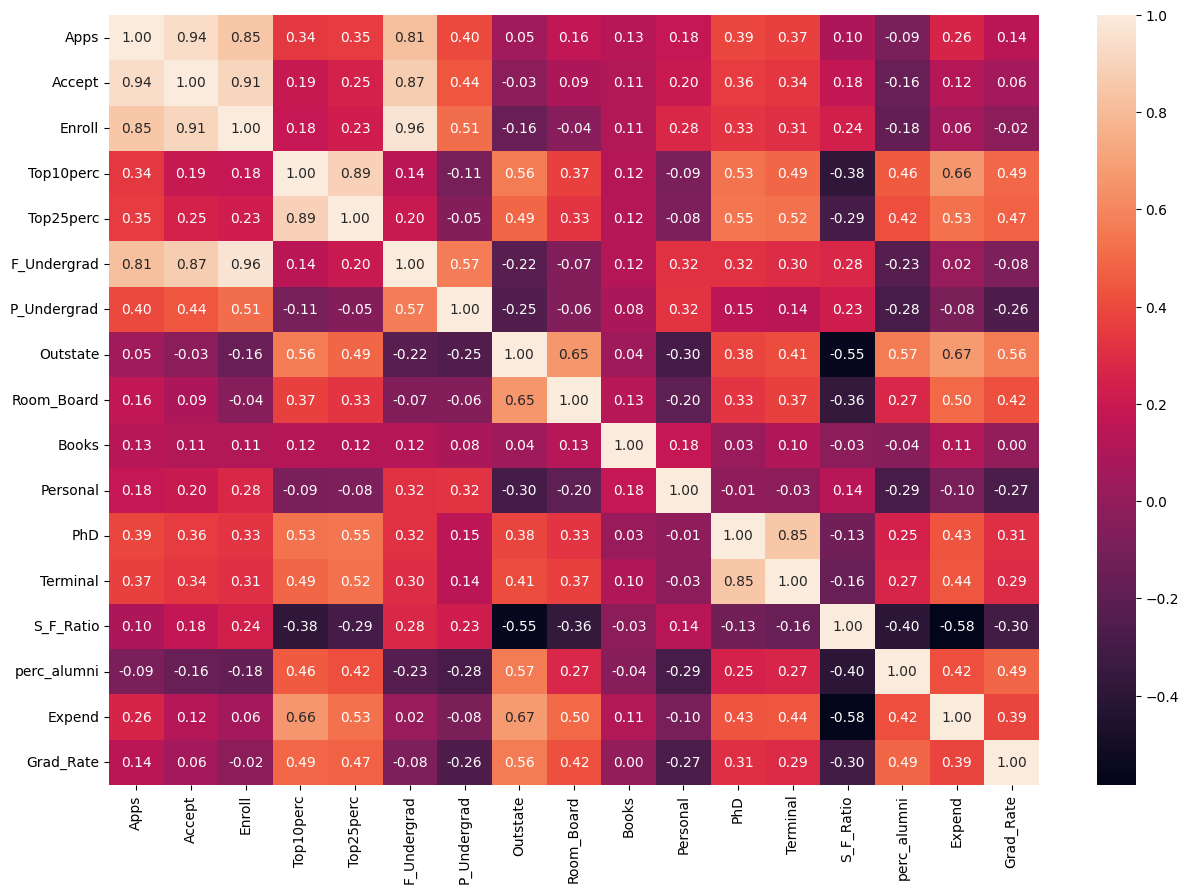

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')
plt.show()

**Observations**:

* We can see a high positive correlation among the following variables:
1. Apps and Accept
2. Apps and Enroll
3. Apps and F_Undergrad
4. Accept and Enroll
5. Accept and F_Undergrad
6. Enroll and F_Undergrad
7. Top10perc and Top25percent
8. PhD and Terminal

* We can see a high negative correlation among the following variables:
1. S_F_Ratio and Top10perc
2. S_F_Ratio and Outstate

## Scaling the data


In [14]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [15]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.322045
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.554707
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.671039
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.380210
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.939500


##Principal Component Analysis

In [61]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

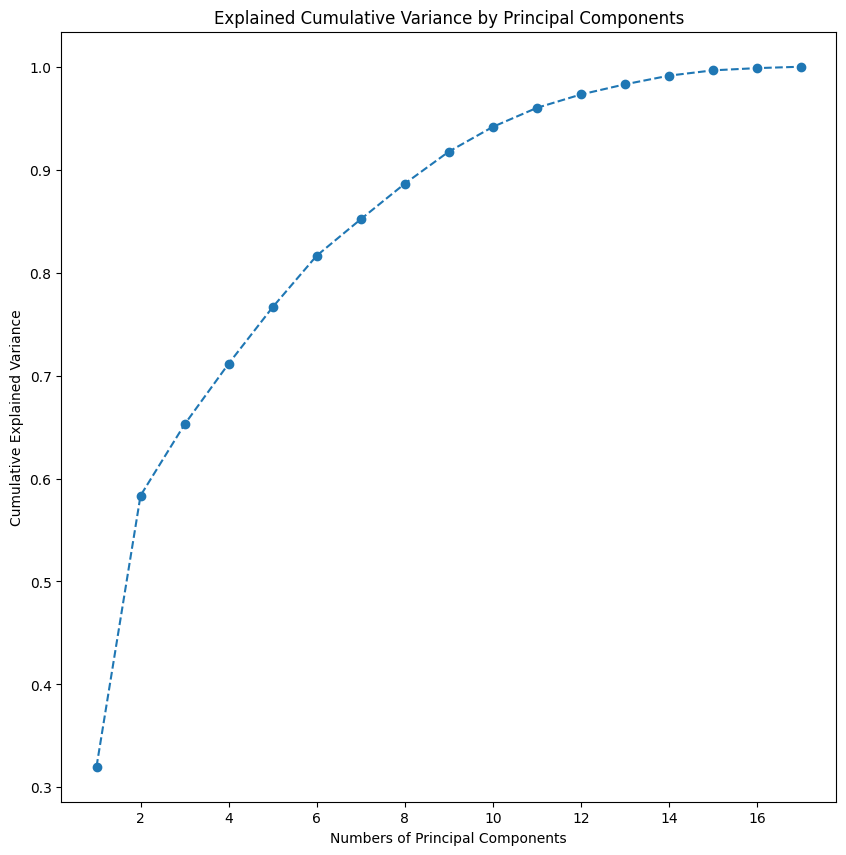

In [17]:
# Plotting the explained cumulative variance by principal components

plt.figure(figsize = (10, 10))

plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title('Explained Cumulative Variance by Principal Components')

plt.xlabel('Numbers of Principal Components')

plt.ylabel('Cumulative Explained Variance')

plt.show()

In [18]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum += i

    if sum > 0.7:

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

Number of PCs that explain at least 70% variance: 4


##Observations:
Through PCA, we've successfully reduced our dataset from 17 features down to 4 principal components. These four components collectively capture approximately 70% of the original variance. This represents a 76% reduction in dimensionality while retaining a significant portion of the data's information.

### Representing PCA value on each feature

In [19]:
pc_comps = ["PC1", "PC2", "PC3", "PC4"]

data_pca = pd.DataFrame(np.round(pca.components_[: 4, : ], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,-0.28
Accept,0.21,0.37,-0.10,-0.27
Enroll,0.18,0.40,-0.08,-0.16
Top10perc,0.35,-0.08,0.03,0.05
Top25perc,0.34,-0.05,-0.02,0.11
F_Undergrad,0.16,0.42,-0.06,-0.10
P_Undergrad,0.03,0.32,0.14,0.16
Outstate,0.29,-0.25,0.05,-0.13
Room_Board,0.25,-0.14,0.15,-0.19
Books,0.06,0.06,0.67,-0.09


In this case, we will consider 0.25 as our threshold value. We will then identify original features whose absolute loading values in the principal components are greater than 0.25, considering them significant contributors to those PCs.

In [32]:
def color_high(val):

    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'

    elif val > 0.25:
        return 'background: skyblue'

data_pca.T.style.map(color_high)


,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,-0.280000
Accept,0.210000,0.370000,-0.100000,-0.270000
Enroll,0.180000,0.400000,-0.080000,-0.160000
Top10perc,0.350000,-0.080000,0.030000,0.050000
Top25perc,0.340000,-0.050000,-0.020000,0.110000
F_Undergrad,0.160000,0.420000,-0.060000,-0.100000
P_Undergrad,0.030000,0.320000,0.140000,0.160000
Outstate,0.290000,-0.250000,0.050000,-0.130000
Room_Board,0.250000,-0.140000,0.150000,-0.190000
Books,0.060000,0.060000,0.670000,-0.090000


###Principal Component Interpretations:
Our analysis found four main "themes" or components in the college data:

**PC1: "Elite Academics"**

This component highlights highly selective colleges with top students, many out-of-state students, well-educated faculty (PhDs, Terminal degrees), and high spending per student. It's about prestige and resources.

**PC2: "Large & Accessible"**

This component captures colleges with high enrollment volumes. It's linked to many applications, acceptances, and a large number of full-time and part-time undergraduates, suggesting institutions that are easier to get into and accommodate many students.

**PC3: "Student Costs & Support"**

This component focuses on student financial burden and individualized attention. It's related to higher personal spending and book costs for students, but also a lower student-to-faculty ratio (meaning more faculty attention).

**PC4: "Graduation Success"**

This component points to colleges with high student graduation rates. Interestingly, it suggests these might not always be the same institutions with the highest percentage of PhD-holding faculty, implying other factors drive student completion.

### PCA Visualization in 2 dimensions

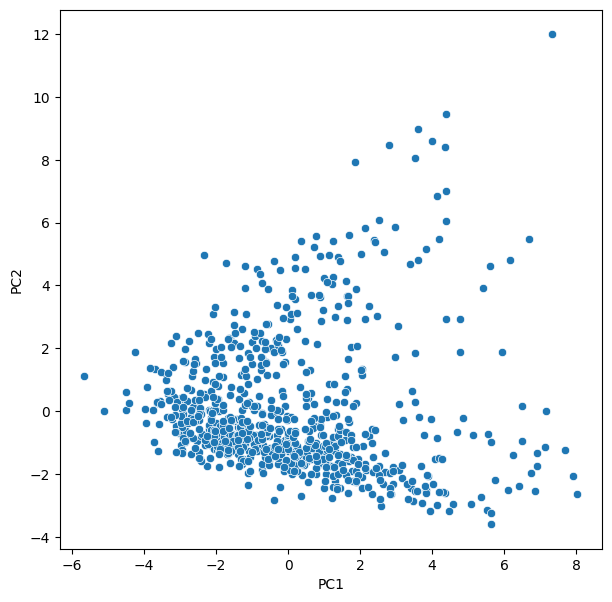

In [62]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

##Observations:

* Many points are concentrated around the origin (0,0), particularly in the range of PC1 from -3 to 2 and PC2 from -3 to 3.

* This suggests that a large portion of the colleges share similar overall profiles.

* The points are continuously distributed, not forming clearly separate groups.



#**t-SNE**


Data Visualization using T-sne in 2 and 3 dimensions


## 2D visualization

In [66]:
tsne = TSNE(n_components = 2, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])

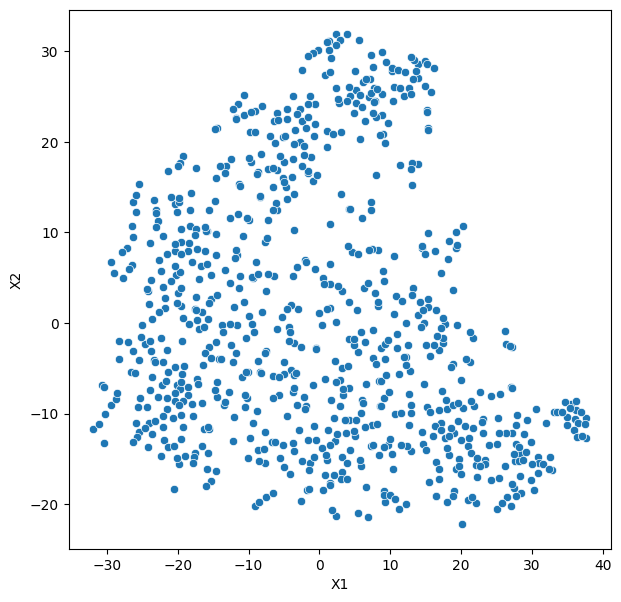

In [67]:
plt.figure(figsize = (7, 7))
sns.scatterplot( x= 'X1', y= 'X2', data = data_tsne)
plt.show()

## 3D visualization

In [68]:
tsne = TSNE(n_components = 3, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2', 'X3'])

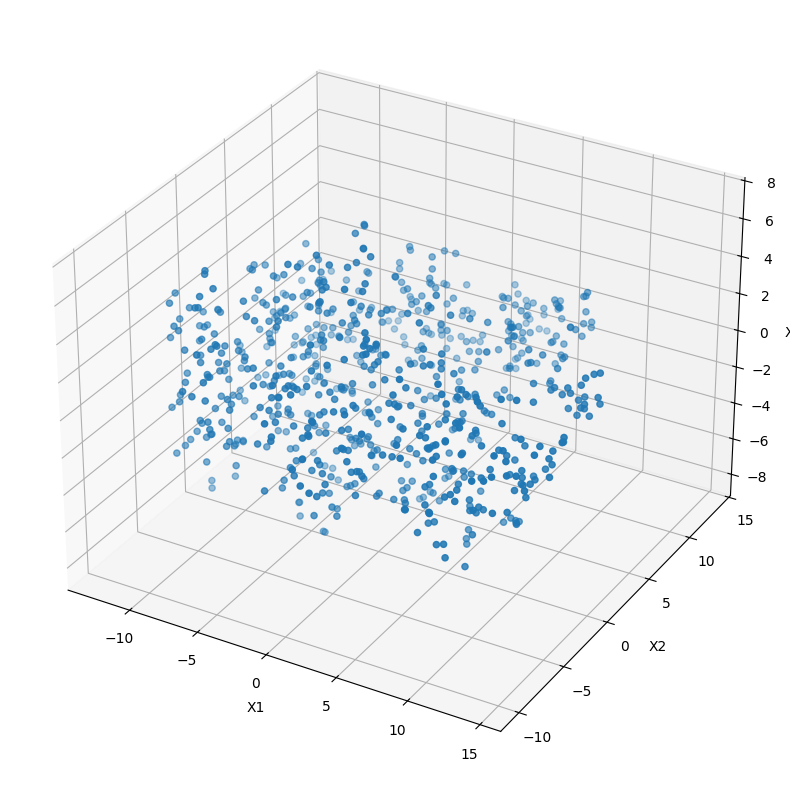

In [76]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data_tsne['X1'], data_tsne['X2'], data_tsne['X3'])

ax.set_xlabel('X1')

ax.set_ylabel('X2')

ax.set_zlabel('X3')

plt.show()

**We can see that there is no pattern in the data - it is scattered and clustered together with the exception of some outliers.**

### Data visualization in 2D with different perplexity values

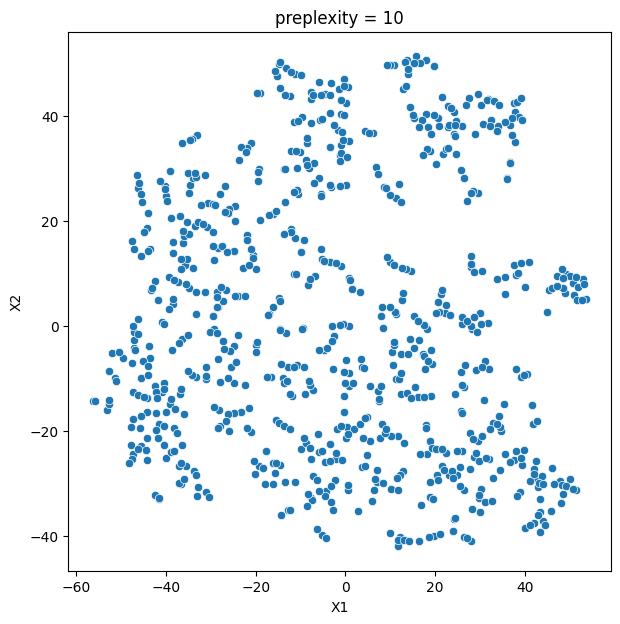

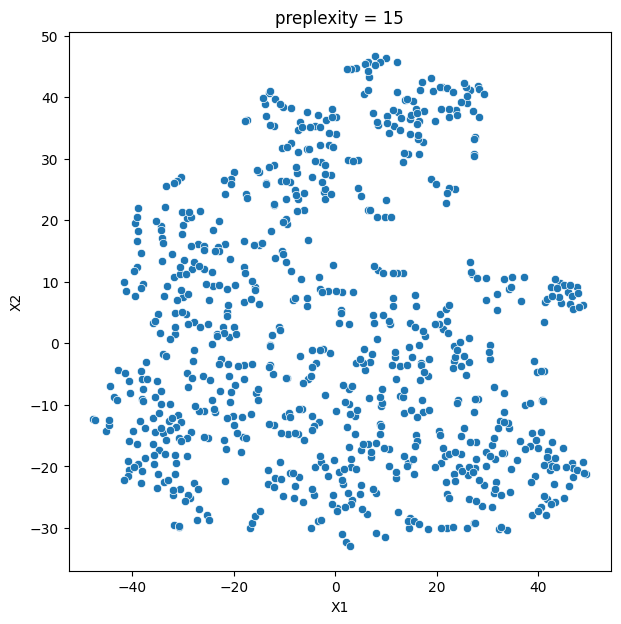

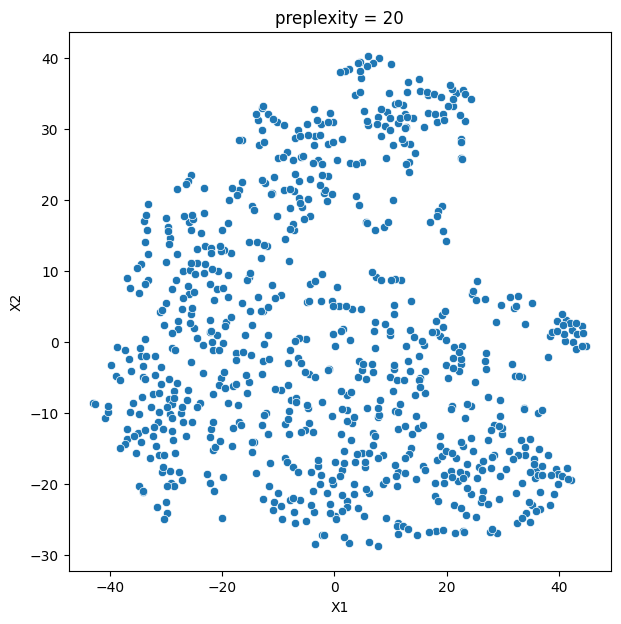

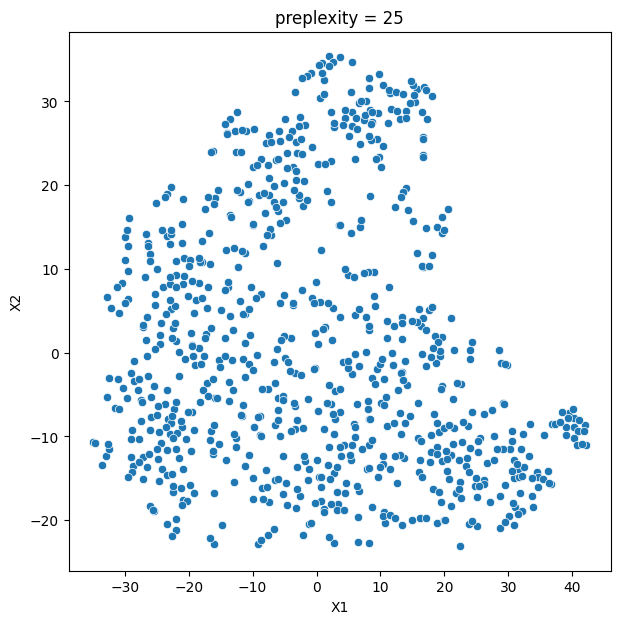

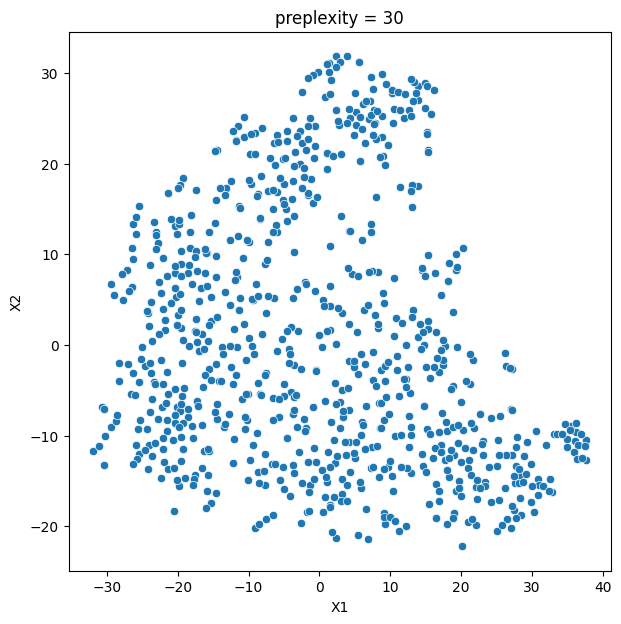

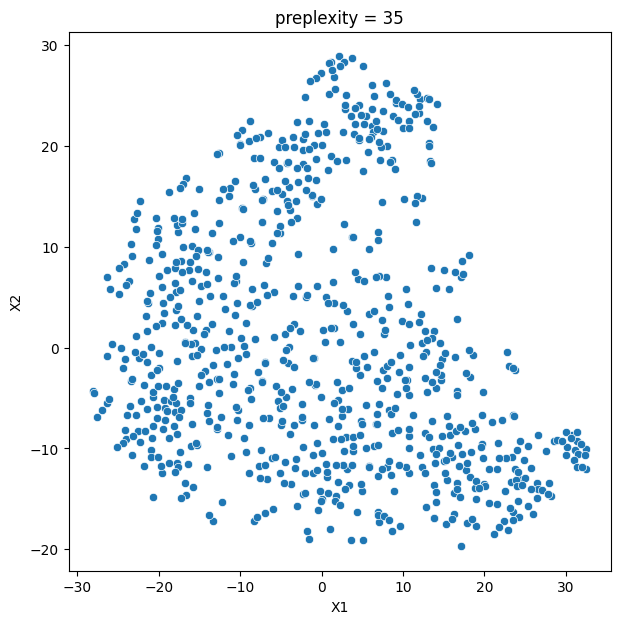

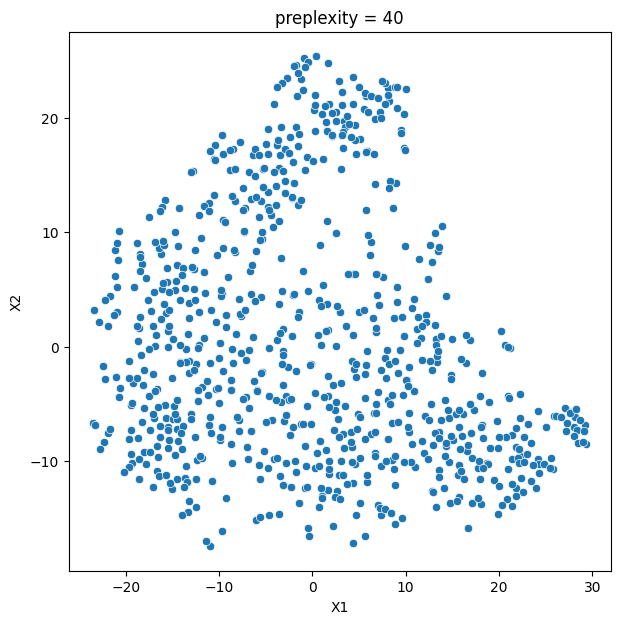

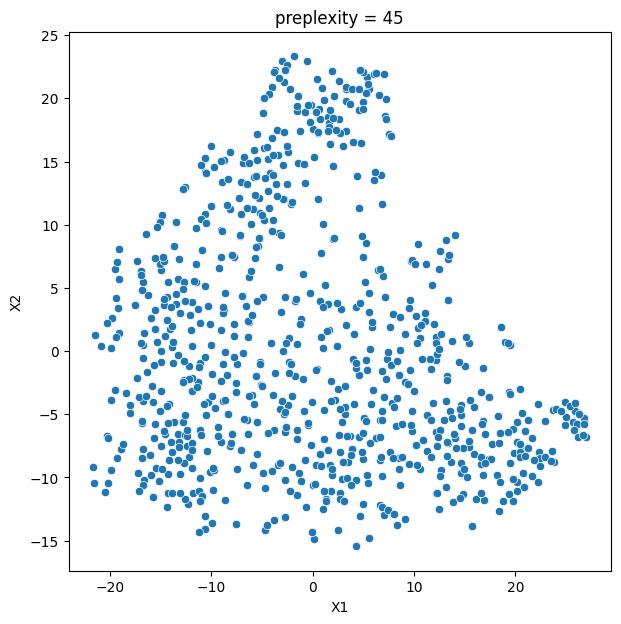

In [78]:
for i in range (10, 50, 5):
  tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
  data_tsne = tsne.fit_transform(data_scaled)
  data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])
  plt.figure(figsize = (7, 7))
  sns.scatterplot( x= 'X1', y= 'X2', data = data_tsne)
  plt.title('preplexity = {}'.format(i))

### Observations:

* we applied t-SNE (a dimensionality reduction and visualization technique) using multiple perplexity values (which affect how t-SNE balances local vs. global structure).

* Despite trying different values (e.g., 10, 15, 20, ..., 45), the resulting 2D plots didn't reveal any clear structure, clusters, or grouping.

* The data points remained scattered randomly, without forming distinguishable patterns or separations.



#Summary
This study demonstrates the power of data visualization and dimensionality reduction techniques (PCA, t-SNE) in unpacking the complexity of higher education data. The following insights emerge:

1. **Resource Intensity vs. Student Success**: Colleges with higher instructional expenditures, PhD-qualified faculty, and more selective admissions tend to align with better graduation rates, but not always. This suggests financial investment and prestige aren't the only drivers of student success.

2. **Scalability and Access**: Larger institutions accept and enroll more students but may compromise on personalized support. However, size alone does not negatively impact graduation rates, suggesting room for scalable models that maintain quality.

3. **Faculty Quality Matters—To a Point**: While faculty qualifications are associated with elite institutions, graduation success (PC4) does not correlate strongly with PhD percentages, implying that student support services, engagement, and curriculum design could play a greater role.

4. **No One-Size-Fits-All Profile**: The lack of distinct clusters in t-SNE implies that colleges operate along multiple, overlapping dimensions—resources, selectivity, support, and scale. Tailored policy and funding decisions are needed rather than broad-brush approaches.

**Strategic Recommendations**:

* Policy Makers should consider multi-dimensional metrics (beyond graduation rate) when assessing institutional performance.

* Colleges could benchmark themselves along the identified components (PC1–PC4) to assess their positioning and areas for improvement.

* Further Research should investigate causality (e.g., does higher spending lead to better outcomes?) and explore clustering with enriched datasets (e.g., regional, program-level data).